## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import metrics

# Housing Data Analysis Project Overview

This notebook will analyze data from the King County House Sales dataset. This dataset contains various information on homes in King County. I will use this data in order to create multiple linear regression models with the purpose of determining which features are most relevant in predicting housing prices. I will then examine the models' output and compare and contrast to determine which model is best at predicting housing prices.

## Business Case/Problem

Hypothetical Situation: A King County real estate agency is looking to provide advice to home owners on what factors are most important in determining the value of their home. Using several multiple linear regression models I will examine which independant variables are most useful at predicting the dependant variable of home price. The regression models will help in providing home owners with relevant information regarding the price of their home should they be interested in listing their home with the real estate agency. 

## Data Description
The data used in this project will provide the following information;

>ID - unique identified for a house

>Date - house was sold

>Price - is prediction target

>Bedrooms - number of Bedrooms/House

>Bathrooms - number of bathrooms/bedrooms

>Sqft_livingsquare - footage of the home

>Sqft_lotsquare - footage of the lot

>FloorsTotal - floors (levels) in house

>Waterfront - House which has a view to a waterfront

>View - Has been viewed

>Condition - How good the condition is ( Overall )

>Grade - overall grade given to the housing unit, based on King County grading system

>Sqft_above - square footage of house apart from basement

>Sqft_basement - square footage of the basement

>Yr_built - Built Year

>Yr_renovated - Year when house was renovated

>Zipcode - zip

>Lat - Latitude coordinate

>Long - Longitude coordinate

>Sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

>Sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Data Load

In [2]:
# Load the Kings County housing data for analysis.
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Review remaining columns to see which ones make the most sense to keep.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Features to remove: 
- 'yr_renovated': large number of missing data.
- 'date': likely not relevant to business problem.
- 'id': likely not relevant to business problem.
- 'waterfront': large number of missing data.
- 'view': likely not relevant to business problem.
- 'yr_renovated': likely not relevant to business problem.
- 'lat': likely not relevant to business problem.
- 'long': likely not relevant to business problem.
- 'sqft_living15': already have data on sqft living.
- 'sqft_lot15': already have data on sqft lot.

## Data Cleaning

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Function to drop unimportant columns from the dataframe.
def filter_columns(df):
    columns_to_keep = ['price','bedrooms', 
                   'bathrooms', 
                   'sqft_living', 
                   'sqft_lot', 
                   'floors', 
                   'condition',
                  'grade',
                  'sqft_above',
                  'yr_built',
                  'zipcode'
                  ]
    return df[columns_to_keep]

In [7]:
# Create new dataframe containing only relevant features.
df_filtered = filter_columns(df)

In [8]:
# Review new dataeframe for analysis.
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
 8   sqft_above   21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


In [9]:
df_filtered.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,98199.000000


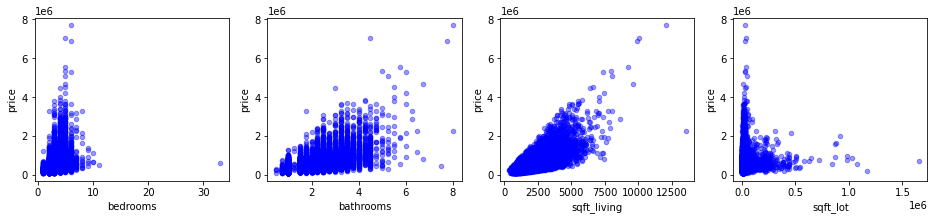

In [10]:
# Create scatter plots to determine the distribution of the features.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 
                     'bathrooms',
                     'sqft_living',
                     'sqft_lot', 
                     ], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

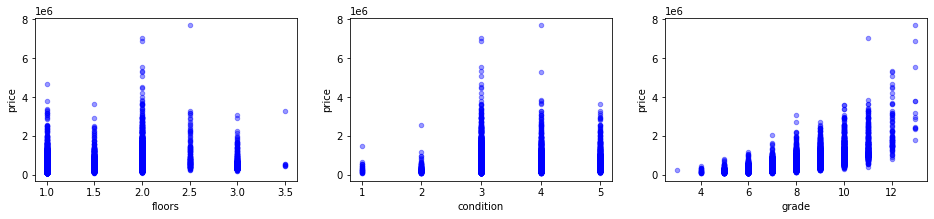

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['floors',
                     'condition',
                     'grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

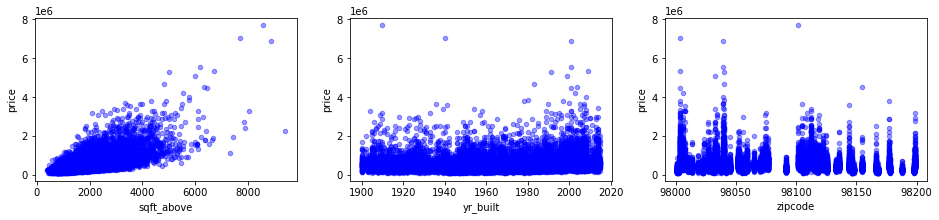

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_above',
                    'yr_built',
                    'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Looking at the above graphs it appears that 'zipcode', 'floors', and 'condition' could be considered categorical data, which will need to be addressed later. Will likely leave 'grade' as numerical data since it appears that a higher grade equates to a higher home price. 'Bedrooms' could also be considered categorical, will need to be addressed.

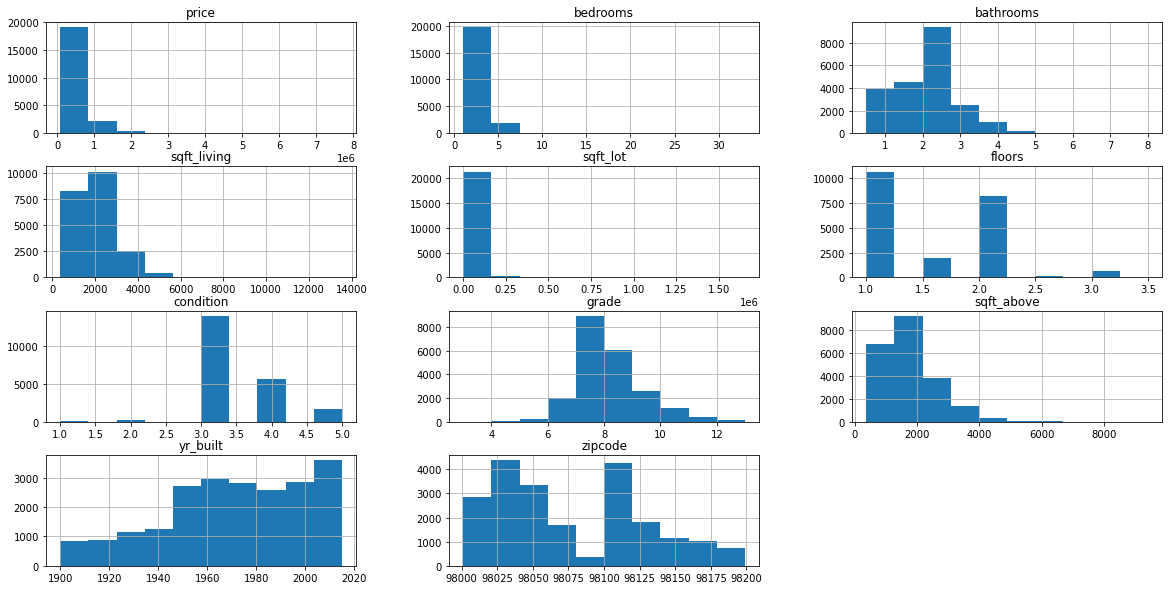

In [13]:
# Create histograms to further analyze the distribution of the features.
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
df_filtered.hist(ax = ax);

Looking at the above graphs it appears that 'price', 'bedrooms', 'bathrooms', sqft_living', 'sqft_lot', and 'sqft_above', and 'yr_built' are not evenly distributed. This is likely due to outliers in the data. Outliers will need to be removed for these and some may need to be log transformed.

### Check for Multicollinearity

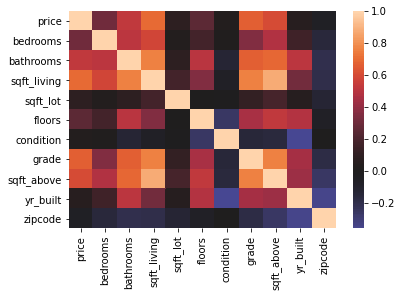

In [14]:
# Created heatmap to determine the multicollinearity of the features. 
sns.heatmap(df_filtered.corr(), center=0);

Noticed that 'sqft_above' and 'sqft_living' are closely related to each other and should not be included together in any models.

# Model A (Simple Model)

Will create a basic model without transforming any features just to get an idea of how the data performs. 

## Feature Engineering

In [15]:
# Model A features:
price_a = df_filtered['price']
bedrooms_a = df_filtered['bedrooms']
bathrooms_a = df_filtered['bathrooms']
sqft_living_a = df_filtered['sqft_living']
grade_a = df_filtered['grade']

In [16]:
# Create dataframe for features.
simple_model_ols = pd.concat([price_a, bedrooms_a, bathrooms_a, sqft_living_a, grade_a], axis=1)
simple_model_ols.head()

,price,bedrooms,bathrooms,sqft_living,grade
0,221900.0,3,1.00,1180,7
1,538000.0,3,2.25,2570,7
2,180000.0,2,1.00,770,6
3,604000.0,4,3.00,1960,7
4,510000.0,3,2.00,1680,8


### Split Data into Training and Test set

In [17]:
# Will seperate data into training and testing sets for analysis.
target_a = simple_model_ols['price']
features_a = simple_model_ols.drop(['price'], axis=1)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(features_a,target_a,test_size=0.2,random_state=42)
y_test_a

3686     132500.0
10247    415000.0
4037     494000.0
3437     355000.0
19291    606000.0
           ...   
2522     175000.0
11119    394950.0
11973    437000.0
17601    293000.0
19844    293467.0
Name: price, Length: 4320, dtype: float64

## Model A Training

In [18]:
outcome_a = 'y_train_a'
predictors_a = X_train_a
pred_sum_a = '+'.join(predictors_a.columns)
formula_a = outcome_a + '~' + pred_sum_a

In [19]:
data_a = pd.concat([X_train_a,y_train_a], axis=1)
data_a.head()

,bedrooms,bathrooms,sqft_living,grade,price
6243,4,2.00,1440,7,332500.0
8986,3,1.75,1430,7,390000.0
9419,4,2.75,3120,9,800000.0
10155,4,2.50,2060,7,462000.0
10436,3,2.00,2500,7,695000.0


In [20]:
#Create OLS Model to analyze Model A.
model_a_ols = ols(formula=formula_a, data=data_a).fit()
model_a_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_a   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5184.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:31:56   Log-Likelihood:            -2.3917e+05
No. Observations:               17277   AIC:                         4.783e+05
Df Residuals:                   17272   BIC:                         4.784e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.87e+05    1.7e+04    -28.689      0.000    -5.2e+05   -4.54e+05
bedrooms    -4.335e+04   2685.131    -16.143      0.000   -4.86e+04   -3.81e+04
bathrooms   -2.448e+04   3936.106     -6.219      0.000   -3.22e+04   -1.68e+04
sqft_living   227.8517      4.065     56.054      0.000     219.884     235.819
grade        9.819e+04   2607.614     37.654      0.000    9.31e+04    1.03e+05
==============================================================================
Omnibus:                    12674.639   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           584848.422
Skew:                           3.045   Prob(JB):                         0.00
Kurtosis:                      30.845   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model A Evaluation

Model A produces p-values of 0 for each feature indicating that there likely is a relationship between the features and the target, which allows us to reject the null hypothesis for these features.  Model A, however, also produces a low R-squared value of .546, indicating that only about 54% of the model's observed variance can be explained by its inputs. Model A also produces a high Skew of 3.045, indicating that the data is not evenly distributed and will need to be transformed. Model A also has a high Kurtosis of 30.845 indicating a heavy tail and the presance of outliers.   

In [21]:
#Create linear regression model using Sklearn.
simple_model = LinearRegression()
simple_model.fit(X_train_a,y_train_a)

LinearRegression()

In [22]:
#Run model on training and testing data.
y_train_pred_a = simple_model.predict(X_train_a)
y_test_pred_a = simple_model.predict(X_test_a)

In [23]:
#Calculate Mean Absolute Error for training and testing data.
print('Train Mean Absolute Error:',metrics.mean_absolute_error(y_train_a, y_train_pred_a))
print('Test Mean Absolute Error:',metrics.mean_absolute_error(y_test_a, y_test_pred_a))

Train Mean Absolute Error: 163322.19664046232
Test Mean Absolute Error: 160590.04935962288


In [24]:
#Calculate Mean Squared Error for training and testing data.
print('Train Mean Squared Error:',metrics.mean_squared_error(y_train_a, y_train_pred_a))
print('Test Mean Squared Error:',metrics.mean_squared_error(y_test_a, y_test_pred_a))

Train Mean Squared Error: 61861240256.03002
Test Mean Squared Error: 60591750008.89411


In [25]:
#Calculate Root Mean Squared Error for training and testing data.
print('Train Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train_a, y_train_pred_a)))
print('Test Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_a, y_test_pred_a)))

Train Root Mean Squared Error: 248719.1996127963
Test Root Mean Squared Error: 246153.91528247955


In [26]:
#Calculate Model A residuals in order to use for graphs.
resid_a = y_test_pred_a - y_test_a

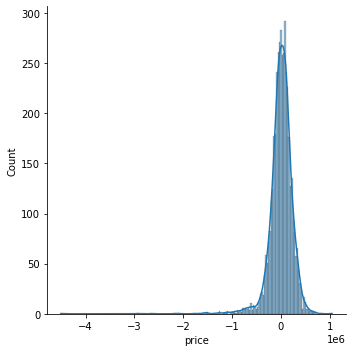

In [27]:
#Create distribution plot to check Model A's distribution of prices
sns.displot(x=resid_a,kind='hist',kde=True);

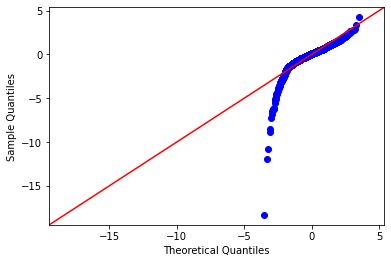

In [28]:
fig = sm.graphics.qqplot(resid_a, dist=stats.norm, line='45',fit=True)

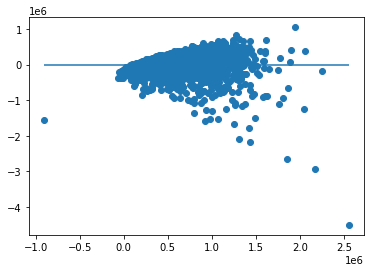

In [29]:
#Create scatter plot to check for homoscedasticity.
plt.scatter(y_test_pred_a, resid_a)
plt.hlines(y=0, xmin=y_test_pred_a.min(), xmax=y_test_pred_a.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

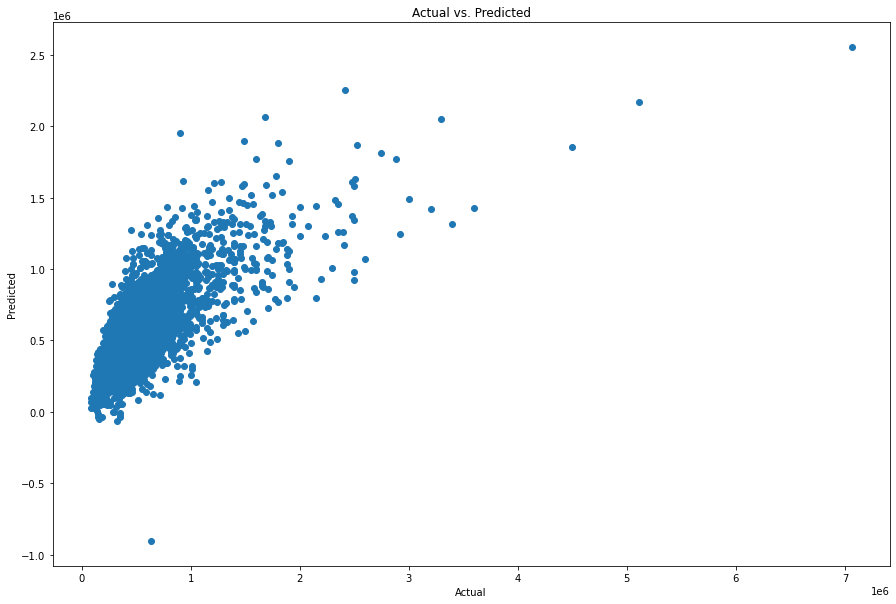

In [30]:
#Create scatter plot to show relationship between actual and predicted data. 
plt.figure(figsize=(15,10))
plt.scatter(y_test_a, y_test_pred_a)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

### Cross Validation

In [31]:
model_a_scores = cross_val_score(simple_model, X_test_a, y_test_a, cv=5)
model_a_scores

array([0.52194145, 0.50012173, 0.55545965, 0.50878098, 0.56754696])

In [32]:
model_a_scores.mean(), model_a_scores.std()

(0.5307701563961759, 0.026316914174252436)

# Model B

## Feature Engineering

### Create Dummy Variables

In [33]:
df_filtered['zipcode'] = df_filtered['zipcode'].astype('str')
df_filtered['yr_built'] = df_filtered['yr_built'].astype('int64')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
 8   sqft_above   21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  object 
dtypes: float64(3), int64(7), object(1)
memory usage: 1.8+ MB


In [34]:
zip_dummies = pd.get_dummies(df_filtered['zipcode'], prefix='zip', drop_first=True)

In [35]:
df_dummies = df_filtered.drop(['zipcode'], axis=1)

In [36]:
df_dummies = pd.concat([df_filtered, zip_dummies], axis=1)
df_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_dummies.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,...,0.013335,0.002639,0.020651,0.011761,0.012455,0.011807,0.012131,0.006297,0.012965,0.014678
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,...,0.114708,0.051307,0.142216,0.107811,0.110909,0.108020,0.109475,0.079106,0.113125,0.120263
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Log Transformations

In [38]:
logsqft = np.log(df_filtered['sqft_living'])

## Model B Training

In [123]:
price_b = df_dummies['price']
bedrooms_b = df_dummies['bedrooms']
scaled_bed_b = (logsqft-np.mean(bedrooms_b))/np.sqrt(np.var(bedrooms_b))
bathrooms_b = df_dummies['bathrooms']
scaled_bath_b = (bathrooms_b-np.mean(bathrooms_b))/np.sqrt(np.var(bathrooms_b))
scaled_sqft
scaled_sqft = (logsqft-np.mean(logsqft))/np.sqrt(np.var(logsqft))
zip_dummies
yr_b = df_dummies['yr_built']
scaled_yr_b = (yr_b-np.mean(yr_b))/np.sqrt(np.var(yr_b))

In [124]:
model_b = pd.concat([price_b, scaled_bed_b, scaled_bath_b, scaled_sqft, zip_dummies, scaled_yr_b], axis=1)
model_b.head()

,price,sqft_living,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yr_built
0,221900.0,3.994559,-1.451073,-1.125582,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.544678
1,538000.0,4.834903,0.174486,0.709463,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.680850
2,180000.0,3.533704,-1.451073,-2.131943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.293626
3,604000.0,4.542375,1.149821,0.070676,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.204247
4,510000.0,4.375956,-0.150626,-0.292732,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.544700


### Split Data into Training and Test Set

In [125]:
target_b = model_b['price']
features_b = model_b.drop(['price'], axis=1)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(features_b,target_b,test_size=0.2,random_state=42)
X_train_b.head()

,sqft_living,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yr_built
6243,4.209536,-0.150626,-0.656140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.034054
8986,4.202013,-0.475738,-0.672568,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.306399
9419,5.044264,0.824709,1.166643,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.327691
10155,4.596097,0.499597,0.187988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.102140
10436,4.805089,-0.150626,0.644360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.668099


In [126]:
outcome_b = 'y_train_b'
predictors_b = X_train_b
pred_sum_b = '+'.join(predictors_b.columns)
formula_b = outcome_b + '~' + pred_sum_b

In [127]:
data_b = pd.concat([X_train_b,y_train_b], axis=1)
data_b.head()

,sqft_living,bathrooms,sqft_living,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yr_built,price
6243,4.209536,-0.150626,-0.656140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.034054,332500.0
8986,4.202013,-0.475738,-0.672568,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.306399,390000.0
9419,5.044264,0.824709,1.166643,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.327691,800000.0
10155,4.596097,0.499597,0.187988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.102140,462000.0
10436,4.805089,-0.150626,0.644360,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.668099,695000.0


In [128]:
model_b_ols = ols(formula=formula_b, data=data_b).fit()
model_b_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_b   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     465.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:39:56   Log-Likelihood:            -2.3664e+05
No. Observations:               17277   AIC:                         4.734e+05
Df Residuals:                   17204   BIC:                         4.740e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2638.8401    768.189      3.435      0.001    1133.111    4144.569
sqft_living[0]  6.992e+04   2685.779     26.033      0.000    6.47e+04    7.52e+04
sqft_living[1]  1.267e+05   2958.108     42.828      0.000    1.21e+05    1.32e+05
bathrooms        6.44e+04   2869.838     22.440      0.000    5.88e+04       7e+04
zip_98002       1.312e+04   2.17e+04      0.604      0.546   -2.95e+04    5.57e+04
zip_98003       1.449e+04   1.94e+04      0.748      0.454   -2.35e+04    5.24e+04
zip_98004        8.47e+05   1.88e+04     45.034      0.000     8.1e+05    8.84e+05
zip_98005       3.756e+05   2.25e+04     16.661      0.000    3.31e+05     4.2e+05
zip_98006       3.769e+05    1.7e+04     22.223      0.000    3.44e+05     4.1e+05
zip_98007       2.612e+05    2.4e+04     10.886      0.000    2.14e+05    3.08e+05
zip_98008       3.124e+05   1.91e+04     16.325      0.000    2.75e+05     3.5e+05
zip_98010       1.195e+05   2.68e+04      4.467      0.000    6.71e+04    1.72e+05
zip_98011       1.264e+05   2.17e+04      5.831      0.000    8.39e+04    1.69e+05
zip_98014       1.511e+05   2.44e+04      6.181      0.000    1.03e+05    1.99e+05
zip_98019       8.815e+04   2.18e+04      4.049      0.000    4.55e+04    1.31e+05
zip_98022       6.069e+04   2.04e+04      2.979      0.003    2.08e+04    1.01e+05
zip_98023      -8804.8296   1.66e+04     -0.529      0.597   -4.14e+04    2.38e+04
zip_98024       2.323e+05   2.88e+04      8.075      0.000    1.76e+05    2.89e+05
zip_98027        2.11e+05   1.73e+04     12.181      0.000    1.77e+05    2.45e+05
zip_98028       1.252e+05   1.93e+04      6.498      0.000    8.74e+04    1.63e+05
zip_98029       2.391e+05   1.87e+04     12.807      0.000    2.03e+05    2.76e+05
zip_98030      -5237.8163      2e+04     -0.262      0.793   -4.44e+04    3.39e+04
zip_98031       2288.2911   1.93e+04      0.119      0.905   -3.55e+04    4.01e+04
zip_98032       1.626e+04   2.51e+04      0.648      0.517   -3.29e+04    6.54e+04
zip_98033       4.173e+05   1.74e+04     23.928      0.000    3.83e+05    4.51e+05
zip_98034       2.236e+05   1.63e+04     13.712      0.000    1.92e+05    2.56e+05
zip_98038        2.38e+04   1.63e+04      1.461      0.144   -8130.382    5.57e+04
zip_98039       1.595e+06   3.51e+04     45.423      0.000    1.53e+06    1.66e+06
zip_98040       6.871e+05   1.94e+04     35.421      0.000    6.49e+05    7.25e+05
zip_98042       2.418e+04   1.65e+04      1.469      0.142   -8072.578    5.64e+04
zip_98045       1.388e+05   2.02e+04      6.860      0.000    9.92e+04    1.79e+05
zip_98052       2.563e+05   1.63e+04     15.727      0.000    2.24e+05    2.88e+05
zip_98053       2.752e+05   1.78e+04     15.499      0.000     2.4e+05     3.1e+05
zip_98055       4.405e+04   1.93e+04      2.287      0.022    6298.024    8.18e+04
zip_98056   

## Model B Evaluation

In [129]:
model_b_lr = LinearRegression()
model_b_lr.fit(X_train_b,y_train_b)

LinearRegression()

In [130]:
y_train_pred_b = model_b_lr.predict(X_train_b)
y_test_pred_b = model_b_lr.predict(X_test_b)

In [131]:
print('Train Mean Absolute Error:',metrics.mean_absolute_error(y_train_b, y_train_pred_b))
print('Test Mean Absolute Error:',metrics.mean_absolute_error(y_test_b, y_test_pred_b))

Train Mean Absolute Error: 124542.03715922903
Test Mean Absolute Error: 122434.73842592593


In [132]:
print('Train Mean Squared Error:',metrics.mean_squared_error(y_train_b, y_train_pred_b))
print('Test Mean Squared Error:',metrics.mean_squared_error(y_test_b, y_test_pred_b))

Train Mean Squared Error: 46190937172.477394
Test Mean Squared Error: 47526010768.88472


In [133]:
print('Train Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train_b, y_train_pred_b)))
print('Test Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_b, y_test_pred_b)))

Train Root Mean Squared Error: 214920.76952327663
Test Root Mean Squared Error: 218004.61180645862


In [135]:
resid_b = y_test_pred_b - y_test_b

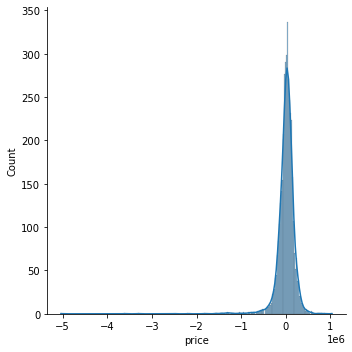

In [136]:
sns.displot(x=resid_b,kind='hist',kde=True);

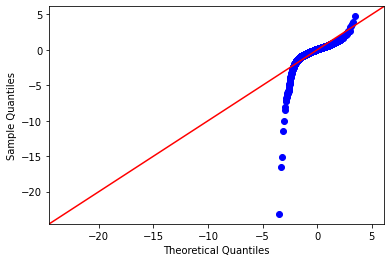

In [137]:
fig = sm.graphics.qqplot(resid_b, dist=stats.norm, line='45',fit=True)

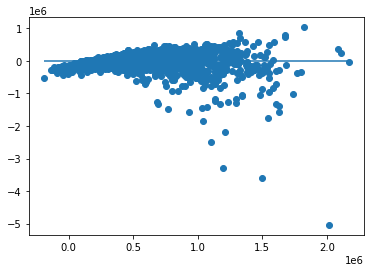

In [138]:
plt.scatter(y_test_pred_b, resid_b)
plt.hlines(y=0, xmin=y_test_pred_b.min(), xmax=y_test_pred_b.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

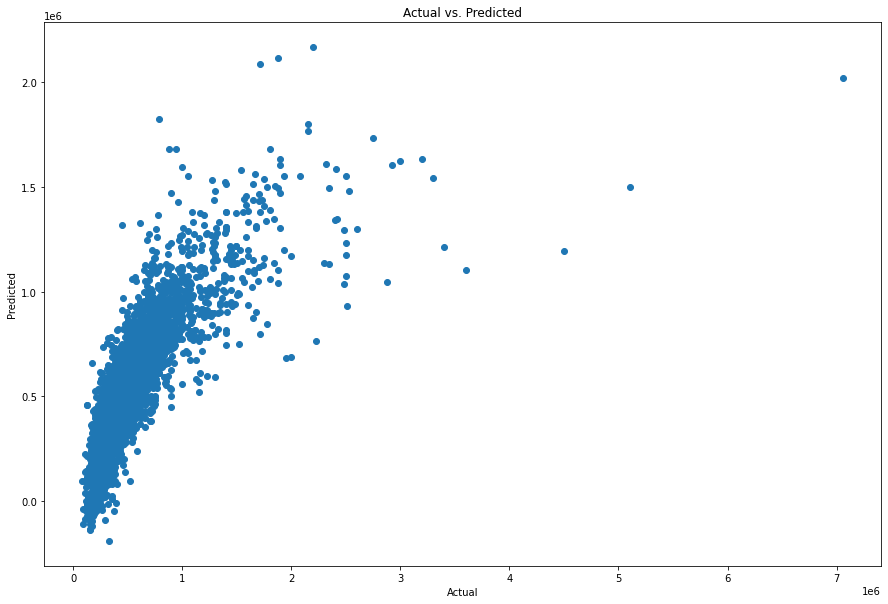

In [139]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_b, y_test_pred_b)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [140]:
model_b_scores = cross_val_score(model_b_lr, X_test_b, y_test_b, cv=5)
model_b_scores

array([0.63687693, 0.69639013, 0.68449481, 0.56097271, 0.62621803])

In [141]:
model_b_scores.mean(), model_b_scores.std()

(0.640990522167117, 0.04816583260810641)

# Model C

## Feature Engineering

## Remove Outliers

In [60]:
df_filtered.bathrooms.mean()

2.1158262721674306

In [61]:
df_filtered.bedrooms.mean()

3.3731999814789093

In [62]:
df_filtered.bedrooms.std()

0.9262988945421479

In [63]:
df_filtered.bathrooms.std()

0.7689842966527209

In [64]:
upper_limit = df_filtered.bathrooms.mean() + 3*df_filtered.bathrooms.std()
upper_limit

4.422779162125593

In [65]:
upper_limit_beds = df_filtered.bedrooms.mean() + 3*df_filtered.bedrooms.std()
upper_limit_beds

6.152096665105352

In [66]:
lower_limit = df_filtered.bathrooms.mean() - 3*df_filtered.bathrooms.std()
lower_limit

-0.19112661779073248

In [67]:
lower_limit_beds = df_filtered.bedrooms.mean() - 3*df_filtered.bedrooms.std()
lower_limit_beds

0.5943032978524658

In [68]:
upper_limit_price = df_filtered.price.mean() + 3*df_filtered.price.std()
upper_limit_price

1642400.9938097629

In [69]:
lower_limit_price = df_filtered.price.mean() - 3*df_filtered.price.std()
lower_limit_price

-561807.8467986039

In [70]:
df_outliers=df_filtered[(df_filtered.bathrooms<upper_limit) & (df_filtered.bathrooms>lower_limit) 
                        & (df_filtered.bedrooms<upper_limit_beds) & (df_filtered.bedrooms>lower_limit_beds)
                       & (df_filtered.price<upper_limit_price) & (df_filtered.price>lower_limit_price)]
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21040 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21040 non-null  float64
 1   bedrooms     21040 non-null  int64  
 2   bathrooms    21040 non-null  float64
 3   sqft_living  21040 non-null  int64  
 4   sqft_lot     21040 non-null  int64  
 5   floors       21040 non-null  float64
 6   condition    21040 non-null  int64  
 7   grade        21040 non-null  int64  
 8   sqft_above   21040 non-null  int64  
 9   yr_built     21040 non-null  int64  
 10  zipcode      21040 non-null  object 
dtypes: float64(3), int64(7), object(1)
memory usage: 1.9+ MB


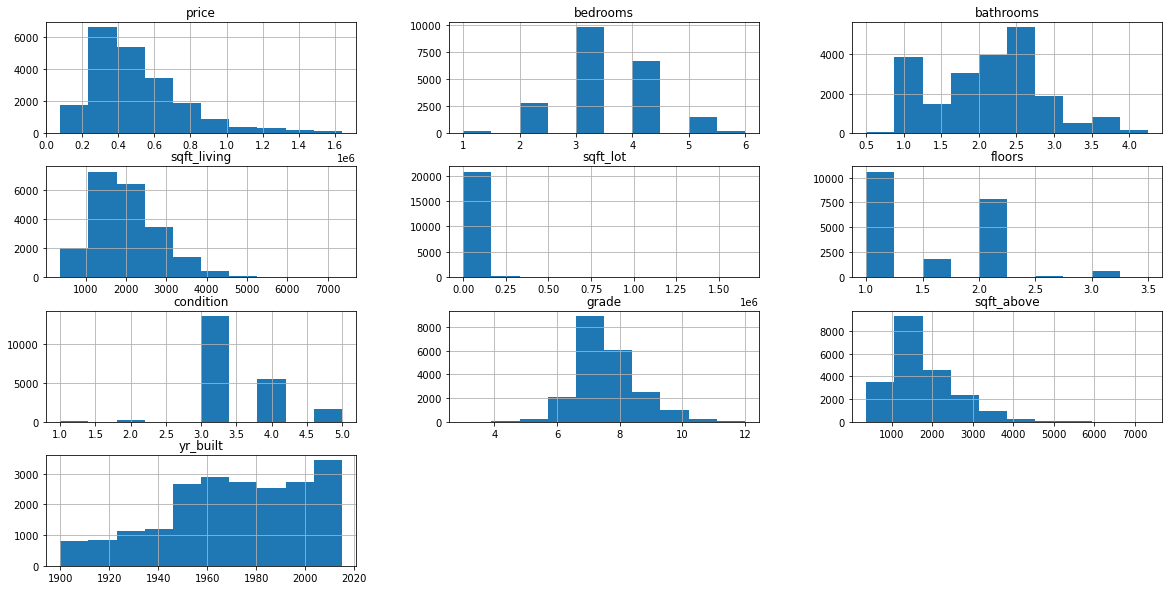

In [71]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
df_outliers.hist(ax = ax);

In [72]:
zip_dummies_c = pd.get_dummies(df_outliers['zipcode'], prefix='zip', drop_first=True)

In [73]:
updated_zip_c = zip_dummies_c.drop(['zip_98002','zip_98003','zip_98022','zip_98023','zip_98030','zip_98031',
                                'zip_98032','zip_98038','zip_98042','zip_98055','zip_98058','zip_98092',
                                  'zip_98188','zip_98168','zip_98178','zip_98188','zip_98148','zip_98198'], axis=1)
updated_zip_c.head()

,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98024,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
model_c = pd.DataFrame([])
price_c = df_outliers['price']
bathrooms_c = df_outliers['bathrooms']
scaled_bath_c = (bathrooms_c-np.mean(bathrooms_c))/np.sqrt(np.var(bathrooms_c))
bedrooms_c = df_outliers['bedrooms']
scaled_bed_c = (bedrooms_c-np.mean(bedrooms_c))/np.sqrt(np.var(bedrooms_c))
log_lot_c = np.log(df_outliers['sqft_lot'])
scaled_log_lot_c = (log_lot_c-np.mean(log_lot_c))/np.sqrt(np.var(log_lot_c))
updated_zip_c
sqfta_c = df_outliers['sqft_above']
scaled_sqfta_c = (sqfta_c-np.mean(sqfta_c))/np.sqrt(np.var(sqfta_c))

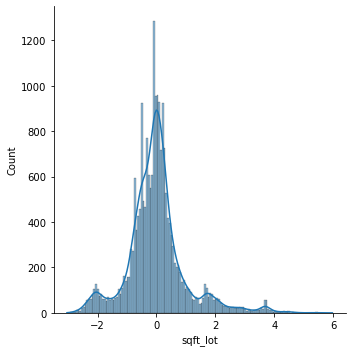

In [75]:
sns.displot(x=scaled_log_lot_c,kind='hist',kde=True);

## Model C Training

In [76]:
model_c = pd.concat([price_c, scaled_bath_c, scaled_bed_c, scaled_log_lot_c, scaled_sqfta_c, updated_zip_c], axis=1)
model_c.head()

,price,bathrooms,bedrooms,sqft_lot,sqft_above,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
0,221900.0,-1.509925,-0.390810,-0.372593,-0.740182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,0.251155,-0.390810,-0.095442,0.568532,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,180000.0,-1.509925,-1.550562,0.264825,-1.282175,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1.307802,0.768942,-0.509044,-0.912034,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,-0.101061,-0.390810,0.026804,-0.079215,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
model_c.describe()

,price,bathrooms,bedrooms,sqft_lot,sqft_above,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
count,2.104000e+04,2.104000e+04,2.104000e+04,2.104000e+04,2.104000e+04,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,...,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000
mean,5.043270e+05,2.161347e-16,9.996229e-17,-4.754963e-16,1.242774e-16,0.010884,0.007700,0.021816,0.006559,0.013070,...,0.019154,0.016778,0.023289,0.012357,0.015684,0.013688,0.020722,0.011835,0.011692,0.014306
std,2.565535e+05,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,0.103760,0.087411,0.146085,0.080723,0.113579,...,0.137069,0.128440,0.150823,0.110478,0.124254,0.116196,0.142457,0.108144,0.107498,0.118752
min,7.800000e+04,-2.214356e+00,-2.710314e+00,-3.035993e+00,-1.810949e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.199500e+05,-8.054929e-01,-3.908100e-01,-5.088209e-01,-7.401823e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.450000e+05,2.511547e-01,-3.908100e-01,-4.820231e-02,-2.642862e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.250000e+05,6.033705e-01,7.689421e-01,3.145553e-01,5.420933e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.640000e+06,3.068882e+00,3.088446e+00,5.966313e+00,7.376490e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
target_c = model_c['price']
features_c = model_c.drop(['price'], axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(features_c,target_c,test_size=0.2,random_state=42)
X_train_c.head()

,bathrooms,bedrooms,sqft_lot,sqft_above,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199
13008,0.603371,0.768942,-0.402634,0.343803,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4152,-0.453277,-0.390810,-0.047464,-0.885595,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20018,0.603371,0.768942,-0.738531,1.062935,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14003,-1.509925,-0.390810,0.101101,-0.766621,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2513,-1.509925,-1.550562,-0.233435,-1.401149,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
outcome_c = 'y_train_c'
predictors_c = X_train_c
pred_sum_c = '+'.join(predictors_c.columns)
formula_c = outcome_c + '~' + pred_sum_c

In [80]:
data_c = pd.concat([X_train_c,y_train_c], axis=1)
data_c.head()

,bathrooms,bedrooms,sqft_lot,sqft_above,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199,price
13008,0.603371,0.768942,-0.402634,0.343803,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,360000.0
4152,-0.453277,-0.390810,-0.047464,-0.885595,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,222000.0
20018,0.603371,0.768942,-0.738531,1.062935,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,415000.0
14003,-1.509925,-0.390810,0.101101,-0.766621,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,255000.0
2513,-1.509925,-1.550562,-0.233435,-1.401149,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,179900.0


In [81]:
model_c_ols = ols(formula=formula_c, data=data_c).fit()
model_c_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_c   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     929.5
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:32:09   Log-Likelihood:            -2.2159e+05
No. Observations:               16832   AIC:                         4.433e+05
Df Residuals:                   16775   BIC:                         4.437e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.023e+05   1952.671    154.839      0.000    2.99e+05    3.06e+05
bathrooms   4.727e+04   1387.613     34.063      0.000    4.45e+04       5e+04
bedrooms    1945.3820   1191.163      1.633      0.102    -389.424    4280.188
sqft_lot    4.949e+04   1253.152     39.493      0.000     4.7e+04    5.19e+04
sqft_above  1.061e+05   1467.632     72.267      0.000    1.03e+05    1.09e+05
zip_98004    6.54e+05   9579.652     68.273      0.000    6.35e+05    6.73e+05
zip_98005    3.78e+05   1.13e+04     33.489      0.000    3.56e+05       4e+05
zip_98006    3.71e+05   6842.081     54.227      0.000    3.58e+05    3.84e+05
zip_98007   2.818e+05   1.23e+04     22.844      0.000    2.58e+05    3.06e+05
zip_98008   2.873e+05   8815.514     32.592      0.000     2.7e+05    3.05e+05
zip_98010   1.082e+04   1.43e+04      0.759      0.448   -1.71e+04    3.88e+04
zip_98011   1.385e+05   1.01e+04     13.756      0.000    1.19e+05    1.58e+05
zip_98014   3.126e+04   1.33e+04      2.358      0.018    5272.392    5.73e+04
zip_98019   3.278e+04   1.04e+04      3.160      0.002    1.24e+04    5.31e+04
zip_98024   9.011e+04   1.83e+04      4.922      0.000    5.42e+04    1.26e+05
zip_98027   2.013e+05   7218.532     27.880      0.000    1.87e+05    2.15e+05
zip_98028   1.394e+05   8614.075     16.188      0.000    1.23e+05    1.56e+05
zip_98029   2.321e+05   8296.113     27.976      0.000    2.16e+05    2.48e+05
zip_98033   3.671e+05   7362.650     49.864      0.000    3.53e+05    3.82e+05
zip_98034   2.001e+05   6497.502     30.791      0.000    1.87e+05    2.13e+05
zip_98039   8.732e+05   3.27e+04     26.687      0.000    8.09e+05    9.37e+05
zip_98040   5.727e+05   9350.573     61.245      0.000    5.54e+05    5.91e+05
zip_98045   5.007e+04   9781.926      5.119      0.000    3.09e+04    6.92e+04
zip_98052   2.663e+05   6229.180     42.747      0.000    2.54e+05    2.78e+05
zip_98053   1.932e+05   7704.143     25.074      0.000    1.78e+05    2.08e+05
zip_98056   1.044e+05   7326.819     14.255      0.000    9.01e+04    1.19e+05
zip_98059   8.962e+04   6801.868     13.175      0.000    7.63e+04    1.03e+05
zip_98065   9.046e+04   8441.184     10.717      0.000    7.39e+04    1.07e+05
zip_98070   9.983e+04   1.34e+04      7.441      0.000    7.35e+04    1.26e+05
zip_98072   1.564e+05   8719.344     17.936      0.000    1.39e+05    1.73e+05
zip_98074   2.184e+05   7159.919     30.499      0.000    2.04e+05    2.32e+05
zip_98075   2.398e+05   8083.930     29.667      0.000    2.24e+05    2.56e+05
zip_98077   1.322e+05   1.05e+04     12.605      0.000    1.12e+05    1.53e+05
zip_98102   5.525e+05   1.45e+04     38.184      0.000    5.24e+05    5.81e+05
zip_98103   3.968e+05   6242.103     63.563      0.000    3.85e+05    4.09e+05
zip_98105   5.343e+05   9957.771     53.660      0.000    5.15e+05    5.54e+05
zi

## Model C Evaluation

In [82]:
model_c_lr = LinearRegression()
model_c_lr.fit(X_train_c,y_train_c)

LinearRegression()

In [83]:
y_train_pred_c = model_c_lr.predict(X_train_c)
y_test_pred_c = model_c_lr.predict(X_test_c)

In [84]:
print('Train Mean Absolute Error:',metrics.mean_absolute_error(y_train_c, y_train_pred_c))
print('Test Mean Absolute Error:',metrics.mean_absolute_error(y_test_c, y_test_pred_c))

Train Mean Absolute Error: 87627.8346856964
Test Mean Absolute Error: 91494.05965551794


In [85]:
print('Train Mean Squared Error:',metrics.mean_squared_error(y_train_c, y_train_pred_c))
print('Test Mean Squared Error:',metrics.mean_squared_error(y_test_c, y_test_pred_c))

Train Mean Squared Error: 15942916481.710066
Test Mean Squared Error: 18275280439.933525


In [86]:
print('Train Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train_b, y_train_pred_b)))
print('Test Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_b, y_test_pred_b)))

Train Root Mean Squared Error: 212551.01745411288
Test Root Mean Squared Error: 215931.77439286857


In [87]:
resid_c = y_test_pred_c - y_test_c
resid_c

21069    192121.645582
21517     -1570.227166
18728    -34789.907673
7977      48943.930369
13857     52930.800866
             ...      
20428   -138605.671559
3124     -47285.651831
17074     83950.355393
4947      39830.857350
3849    -379025.722705
Name: price, Length: 4208, dtype: float64

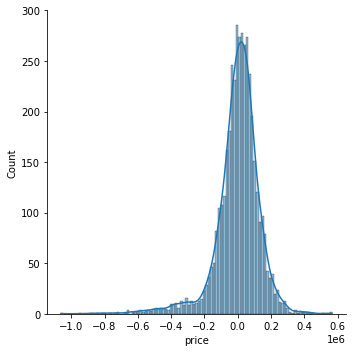

In [88]:
sns.displot(x=resid_c,kind='hist',kde=True);

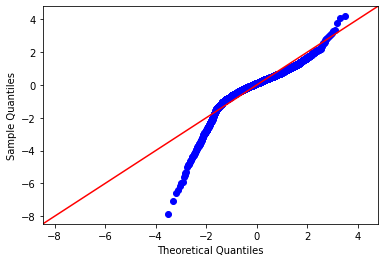

In [89]:
fig = sm.graphics.qqplot(resid_c, dist=stats.norm, line='45',fit=True)

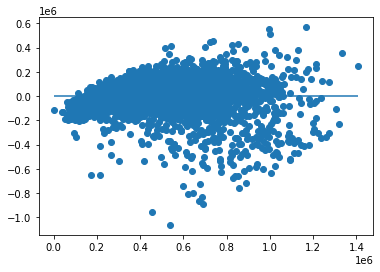

In [90]:
plt.scatter(y_test_pred_c, resid_c)
plt.hlines(y=0, xmin=y_test_pred_c.min(), xmax=y_test_pred_c.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

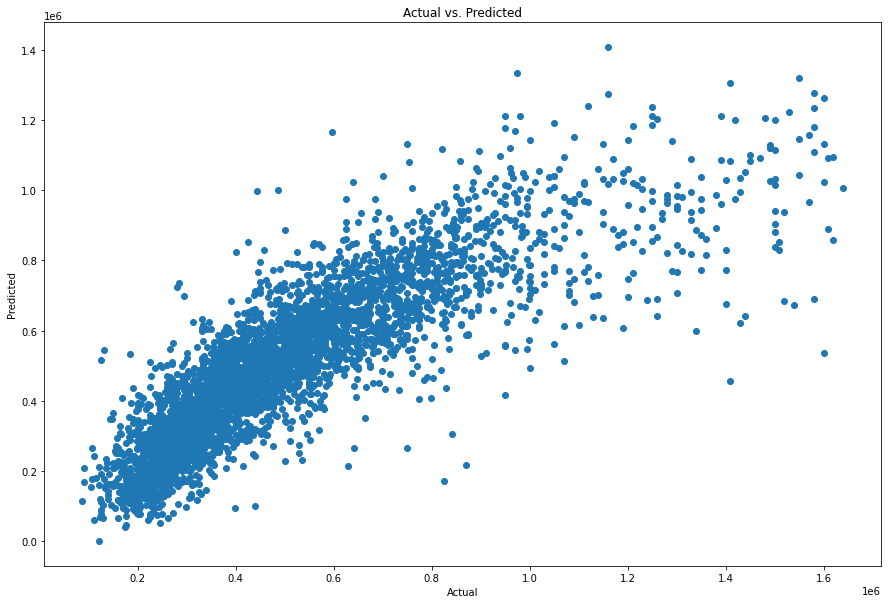

In [91]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_c, y_test_pred_c)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [92]:
model_c_scores = cross_val_score(model_c_lr, X_test_c, y_test_c, cv=5)
model_c_scores

array([0.73035495, 0.71383729, 0.68529982, 0.72772564, 0.7673963 ])

In [93]:
model_c_scores.mean(), model_c_scores.std()

(0.7249227989485183, 0.026586579102625185)

# Model D

## Feature Engineering

### Remove Outliers

In [94]:
df_filtered.sqft_living.std()

918.1061250800805

In [95]:
upper_limit_sqft = df_filtered.sqft_living.mean() + 3*df_filtered.sqft_living.std()
upper_limit_sqft

4834.640225497222

In [96]:
lower_limit_sqft = df_filtered.sqft_living.mean() - 3*df_filtered.sqft_living.std()
lower_limit_sqft

-673.9965249832612

In [97]:
df_filtered.sqft_lot.std()

41412.636875502074

In [98]:
upper_limit_lot = df_filtered.sqft_lot.mean() + 3*df_filtered.sqft_lot.std()
upper_limit_lot

139337.3193869822

In [99]:
lower_limit_lot = df_filtered.sqft_lot.mean() - 3*df_filtered.sqft_lot.std()
lower_limit_lot

-109138.50186603024

In [100]:
df_outliers_2=df_outliers[(df_filtered.sqft_living<upper_limit_sqft) & (df_filtered.sqft_living>lower_limit_sqft) 
                         & (df_filtered.sqft_lot<upper_limit_lot) & (df_filtered.sqft_lot>lower_limit_lot)]
df_outliers_2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.002343e+05,3.332655,2.061604,1995.320155,10680.678004,1.481420,3.412258,7.576744,1719.515795,1970.606347
std,2.531872e+05,0.860152,0.703132,782.278708,13530.221307,0.538508,0.650489,1.079801,730.398822,29.333977
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,1.000000,3.000000,370.000000,1900.000000
25%,3.170000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,3.000000,7.000000,1180.000000,1951.000000
50%,4.410000e+05,3.000000,2.250000,1870.000000,7495.000000,1.000000,3.000000,7.000000,1530.000000,1974.000000
75%,6.200000e+05,4.000000,2.500000,2470.000000,10200.000000,2.000000,4.000000,8.000000,2120.000000,1996.000000
max,1.640000e+06,6.000000,4.250000,4800.000000,138085.000000,3.500000,5.000000,12.000000,4800.000000,2015.000000


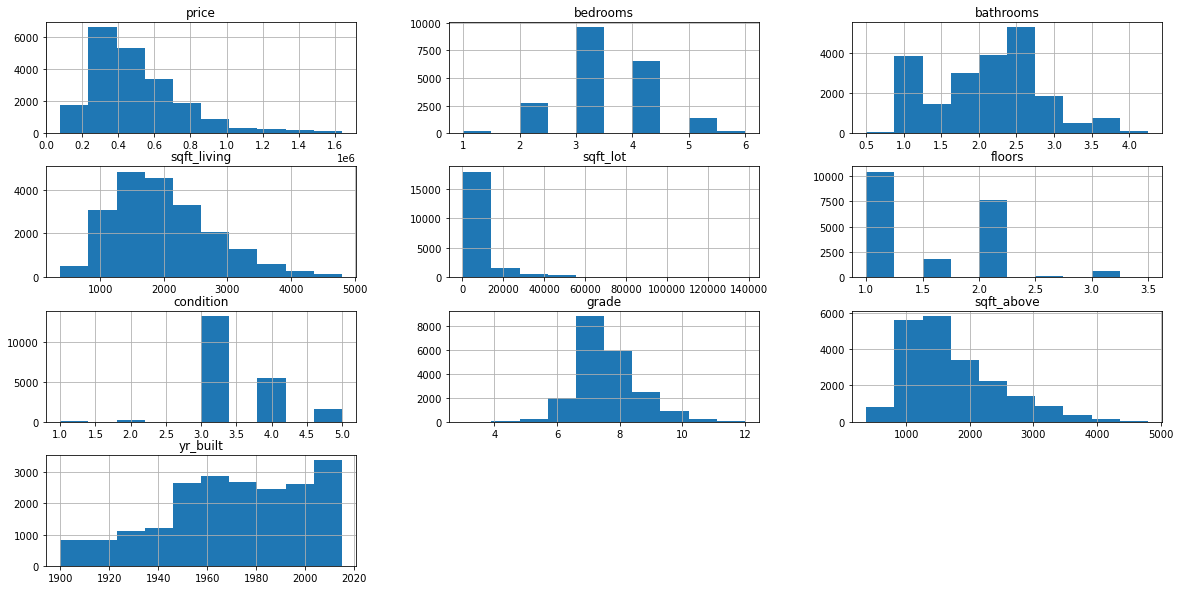

In [101]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
df_outliers_2.hist(ax = ax);

In [102]:
price_d = df_outliers_2['price']
grade_d = df_outliers_2['grade']
scaled_grade_d = (grade_d-np.mean(grade_d))/np.sqrt(np.var(grade_d))
bathrooms_d = df_outliers_2['bathrooms']
scaled_bath_d = (bathrooms_d-np.mean(bathrooms_d))/np.sqrt(np.var(bathrooms_d))
bedrooms_d = df_outliers_2['bedrooms']
scaled_bed_d = (bedrooms_d-np.mean(bedrooms_d))/np.sqrt(np.var(bedrooms_d))
sqft_living_d = df_outliers_2['sqft_living']
scaled_sqftl_d = (sqft_living_d-np.mean(sqft_living_d))/np.sqrt(np.var(sqft_living_d))
zip_dummies_d = pd.get_dummies(df_outliers_2['zipcode'], prefix='zip', drop_first=True)
updated_zip_d = zip_dummies_d.drop(['zip_98002','zip_98003','zip_98022','zip_98023','zip_98030','zip_98031',
                                'zip_98032','zip_98038','zip_98042','zip_98055','zip_98058','zip_98092',
                                  'zip_98188','zip_98168','zip_98178','zip_98188','zip_98148','zip_98198'], axis=1)
log_yr_d = np.log(df_outliers_2['yr_built'])
scaled_yr_d = (log_yr_d-np.mean(log_yr_d))/np.sqrt(np.var(log_yr_d))

## Model D Training

In [103]:
model_d = pd.concat([price_d, scaled_bath_d, scaled_bed_d, scaled_grade_d, 
                     scaled_sqftl_d, updated_zip_d, scaled_yr_d], axis=1)
model_d.head()

,price,bathrooms,bedrooms,grade,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,...,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199,yr_built
0,221900.0,-1.509859,-0.386749,-0.534134,-1.042263,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.524821
1,538000.0,0.267945,-0.386749,-0.534134,0.734641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.661930
2,180000.0,-1.509859,-1.549363,-1.460253,-1.566385,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.282418
3,604000.0,1.334628,0.775864,-0.534134,-0.045151,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-0.183273
4,510000.0,-0.087615,-0.386749,0.391985,-0.403089,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.562055


In [104]:
target_d = model_d['price']
features_d = model_d.drop(['price'], axis=1)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(features_d,target_d,test_size=0.2,random_state=42)

In [105]:
outcome_d = 'y_train_d'
predictors_d = X_train_d
pred_sum_d = '+'.join(predictors_d.columns)
formula_d = outcome_d + '~' + pred_sum_d

In [106]:
data_d = pd.concat([X_train_d,y_train_d], axis=1)
data_d.head()

,bathrooms,bedrooms,grade,sqft_living,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,...,zip_98133,zip_98136,zip_98144,zip_98146,zip_98155,zip_98166,zip_98177,zip_98199,yr_built,price
14837,0.623506,0.775864,0.391985,0.670723,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.224069,865000.0
8642,-1.509859,-0.386749,-0.534134,-1.208448,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.387993,249000.0
18229,-1.509859,-0.386749,-0.534134,-0.684325,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-2.224069,538000.0
14910,0.623506,-0.386749,1.318105,1.067011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.032070,590000.0
2370,-1.509859,-1.549363,-1.460253,-1.195664,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,-0.627626,254000.0


In [107]:
model_d_ols = ols(formula=formula_d, data=data_d).fit()
model_d_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_train_d   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1170.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:32:17   Log-Likelihood:            -2.1552e+05
No. Observations:               16512   AIC:                         4.312e+05
Df Residuals:                   16454   BIC:                         4.316e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.429e+05   1804.492    190.022      0.000    3.39e+05    3.46e+05
bathrooms    1.315e+04   1499.036      8.772      0.000    1.02e+04    1.61e+04
bedrooms    -1.268e+04   1155.525    -10.970      0.000   -1.49e+04   -1.04e+04
grade        7.228e+04   1509.255     47.889      0.000    6.93e+04    7.52e+04
sqft_living  1.083e+05   1736.326     62.361      0.000    1.05e+05    1.12e+05
zip_98004    5.946e+05   8873.263     67.012      0.000    5.77e+05    6.12e+05
zip_98005    3.035e+05   1.02e+04     29.810      0.000    2.84e+05    3.23e+05
zip_98006    2.687e+05   6353.330     42.297      0.000    2.56e+05    2.81e+05
zip_98007    2.311e+05   1.11e+04     20.818      0.000    2.09e+05    2.53e+05
zip_98008    2.352e+05   7864.444     29.906      0.000     2.2e+05    2.51e+05
zip_98010    7.562e+04   1.42e+04      5.310      0.000    4.77e+04    1.04e+05
zip_98011    1.127e+05   9282.769     12.143      0.000    9.45e+04    1.31e+05
zip_98014    1.019e+05   1.33e+04      7.679      0.000    7.59e+04    1.28e+05
zip_98019    7.648e+04   9596.976      7.969      0.000    5.77e+04    9.53e+04
zip_98024    1.313e+05   1.69e+04      7.746      0.000    9.81e+04    1.64e+05
zip_98027    1.686e+05   6686.756     25.215      0.000    1.55e+05    1.82e+05
zip_98028    1.104e+05   7580.195     14.559      0.000    9.55e+04    1.25e+05
zip_98029    1.951e+05   7365.818     26.490      0.000    1.81e+05     2.1e+05
zip_98033    3.309e+05   6539.251     50.607      0.000    3.18e+05    3.44e+05
zip_98034    1.705e+05   5778.908     29.503      0.000    1.59e+05    1.82e+05
zip_98039    7.873e+05   2.93e+04     26.909      0.000     7.3e+05    8.45e+05
zip_98040    4.756e+05   8704.354     54.642      0.000    4.59e+05    4.93e+05
zip_98045    9.575e+04   9107.089     10.514      0.000    7.79e+04    1.14e+05
zip_98052    2.246e+05   5623.490     39.938      0.000    2.14e+05    2.36e+05
zip_98053     2.19e+05   6981.669     31.364      0.000    2.05e+05    2.33e+05
zip_98056    9.661e+04   6640.569     14.549      0.000    8.36e+04     1.1e+05
zip_98059    9.353e+04   6268.062     14.921      0.000    8.12e+04    1.06e+05
zip_98065    1.112e+05   7677.437     14.480      0.000    9.61e+04    1.26e+05
zip_98070    1.459e+05    1.3e+04     11.188      0.000     1.2e+05    1.71e+05
zip_98072    1.557e+05   8134.649     19.141      0.000     1.4e+05    1.72e+05
zip_98074     1.73e+05   6511.934     26.567      0.000     1.6e+05    1.86e+05
zip_98075    2.174e+05   7220.160     30.110      0.000    2.03e+05    2.32e+05
zip_98077    1.458e+05   9963.512     14.634      0.000    1.26e+05    1.65e+05
zip_98102    3.846e+05   1.34e+04     28.708      0.000    3.58e+05    4.11e+05
zip_98103    2.759e+05   5661.875     48.729      0.000    2.65e+05    2.87e+05
zip_98105    3.854e+05   8939.319     43.11

## Model D Evalutation

In [108]:
model_d_lr = LinearRegression()
model_d_lr.fit(X_train_d, y_train_d)

LinearRegression()

In [109]:
model_d_lr.intercept_

342894.13772164297

In [110]:
y_train_pred_d = model_d_lr.predict(X_train_d)
y_test_pred_d = model_d_lr.predict(X_test_d)

In [111]:
print('Train Mean Absolute Error:',metrics.mean_absolute_error(y_train_d, y_train_pred_d))
print('Test Mean Absolute Error:',metrics.mean_absolute_error(y_test_d, y_test_pred_d))

Train Mean Absolute Error: 78335.35096374531
Test Mean Absolute Error: 78281.72847877092


In [112]:
print('Train Mean Squared Error:',metrics.mean_squared_error(y_train_d, y_train_pred_d))
print('Test Mean Squared Error:',metrics.mean_squared_error(y_test_d, y_test_pred_d))

Train Mean Squared Error: 12728599390.46144
Test Mean Squared Error: 12423811108.205994


In [113]:
print('Train Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train_d, y_train_pred_d)))
print('Test Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test_d, y_test_pred_d)))

Train Root Mean Squared Error: 112821.09461648313
Test Root Mean Squared Error: 111462.15101192868


In [114]:
resid_d = y_test_pred_d - y_test_d
resid_d

20967     13656.761634
3161     109984.406875
16374    109690.262071
21426    -51813.305123
10250    -37284.817820
             ...      
16065    140369.326155
17372   -347979.423863
18906    -14633.995703
2238     -62020.985946
3836     -24781.648437
Name: price, Length: 4128, dtype: float64

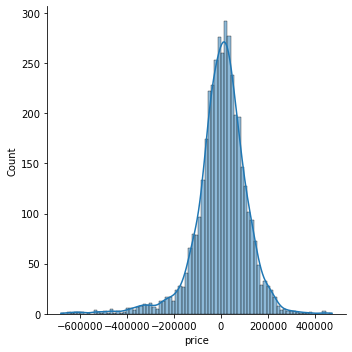

In [115]:
sns.displot(x=resid_d,kind='hist',kde=True);

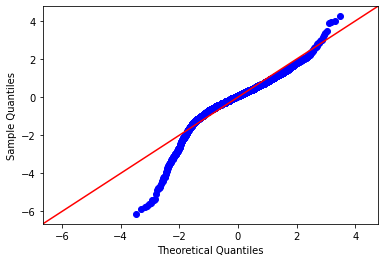

In [116]:
fig = sm.graphics.qqplot(resid_d, dist=stats.norm, line='45',fit=True)

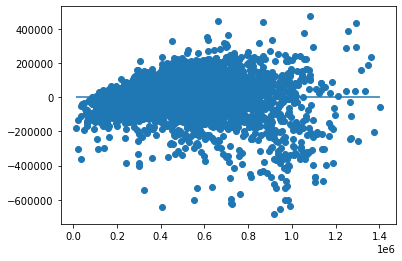

In [117]:
plt.scatter(y_test_pred_d, resid_d)
plt.hlines(y=0, xmin=y_test_pred_d.min(), xmax=y_test_pred_d.max())

Text(0.5, 1.0, 'Actual vs. Predicted')

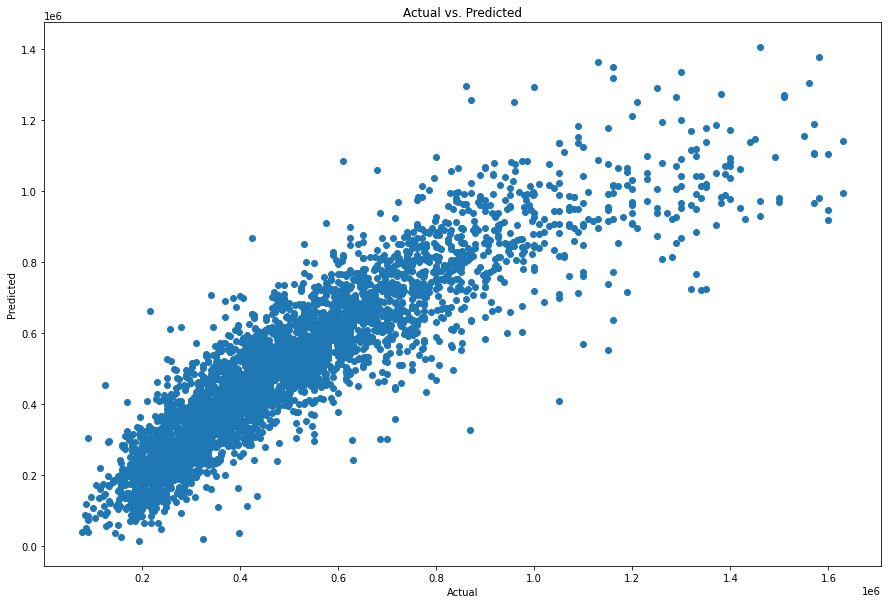

In [118]:
plt.figure(figsize=(15,10))
plt.scatter(y_test_d, y_test_pred_d)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [119]:
model_d_scores = cross_val_score(model_d_lr, X_test_d, y_test_d, cv=5)
model_d_scores

array([0.79719856, 0.80451355, 0.79035411, 0.78734618, 0.80843789])

In [120]:
model_d_scores.mean(), model_d_scores.std()

(0.7975700559273016, 0.008038127582128858)

## Conclusions/Summary